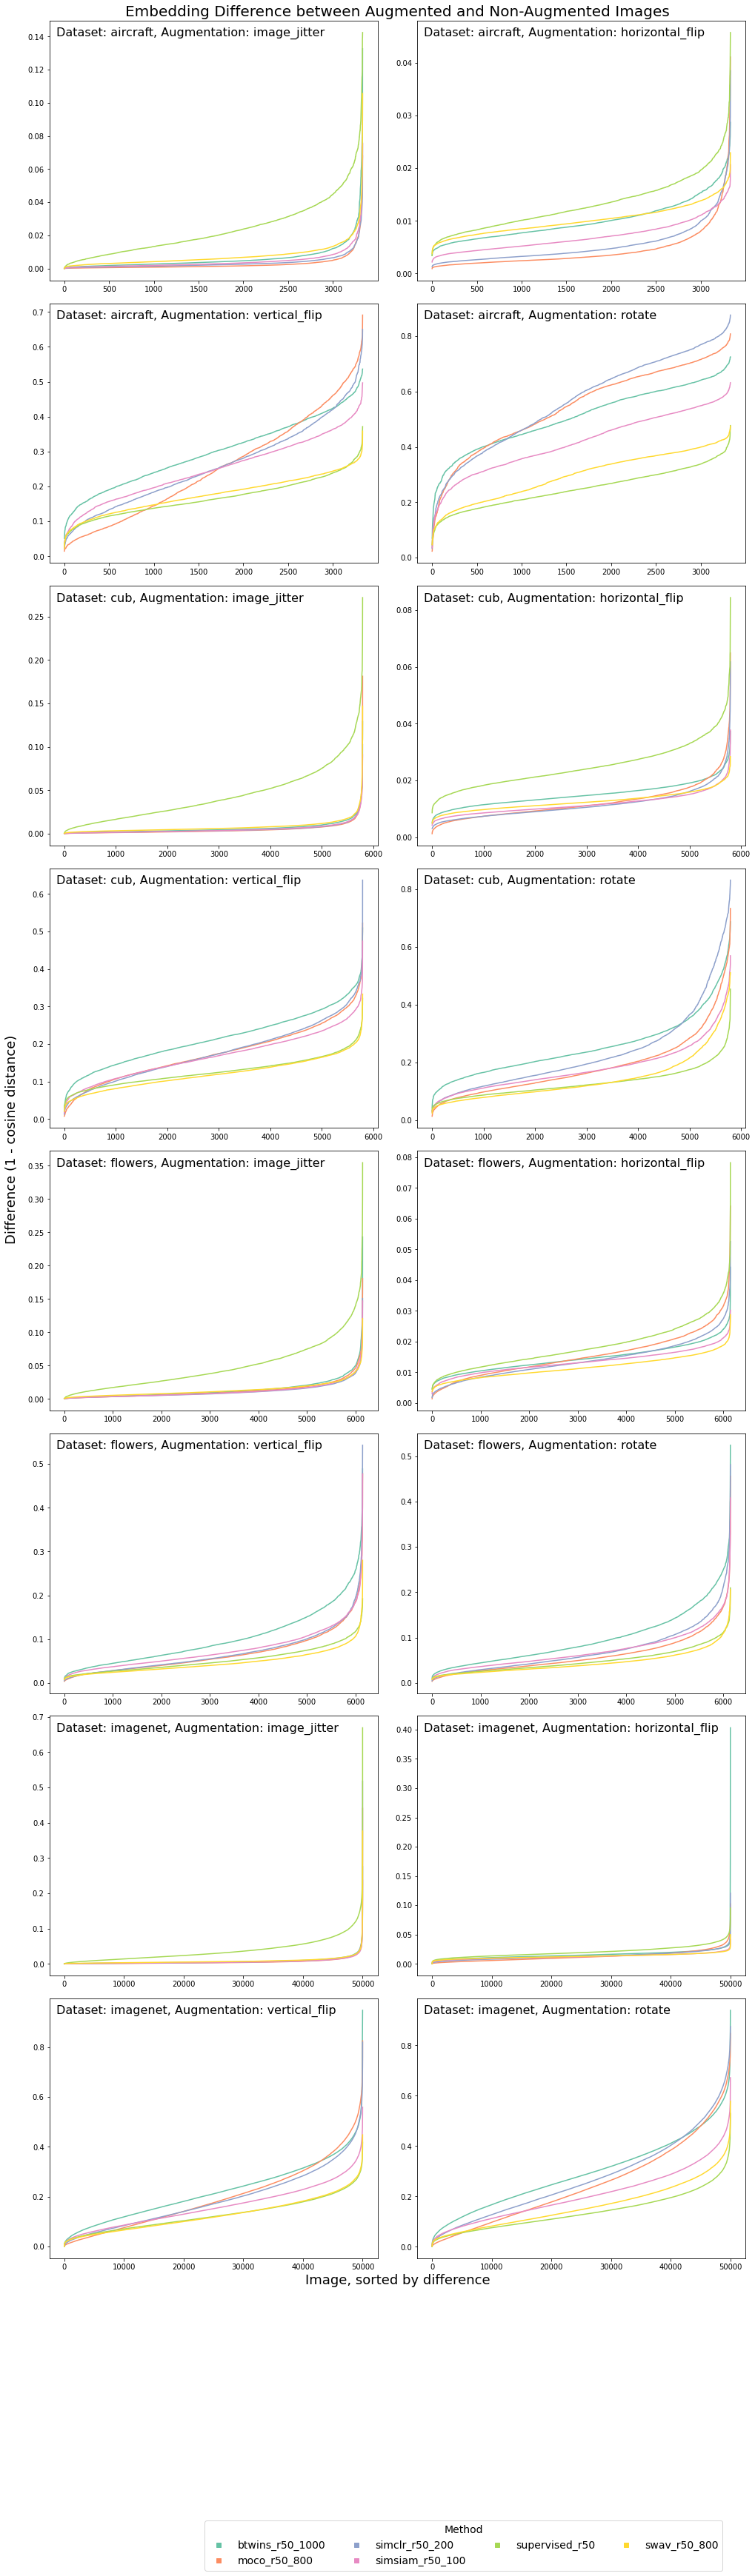

In [7]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
cmap = plt.get_cmap('Set2')
colormap = np.array(list(cmap.colors))

#datasets = ['aircraft', 'cub', 'cars', 'dogs', 'flowers', 'nabirds', 'imagenet']
datasets = ['aircraft', 'cub', 'flowers', 'imagenet']
#transforms = ['image_jitter', 'image_blur', 'horizontal_flip', 'vertical_flip', 'rotate']
transforms = ['image_jitter', 'horizontal_flip', 'vertical_flip', 'rotate']
#method_names = ['btwins_r50_1000', 'dcv2_r50_800', 'moco_r50_800', 'simclr_r50_800', 'simsiam_r50_100', 'supervised_r50', 'swav_r50_800']
method_names = ['btwins_r50_1000', 'moco_r50_800', 'simclr_r50_200', 'simsiam_r50_100', 'supervised_r50', 'swav_r50_800']

fig, axs = plt.subplots(int(len(datasets) * len(transforms) / 2), 2)
#plt.rcParams["figure.figsize"] = (15, 6 * int(len(datasets) * len(transforms) / 2))
plt.rcParams["figure.figsize"] = (6 * int(len(datasets) * len(transforms) / 2), 15)

counter = 0
for i, dataset in enumerate(datasets):
    for j, transform in enumerate(transforms):
        for k, method_name in enumerate(method_names):
            sims = torch.load('/vulcanscratch/mgwillia/vissl/features/' + '_'.join([method_name, dataset, transform, 'similarities']) + '.pth.tar')['val_similarities'].squeeze().numpy()
            diffs = (1 - sims)
            diffs.sort()
            axs[int(counter / 2), int(counter % 2)].plot(diffs, c=colormap[k])
        axs[int(counter / 2), int(counter % 2)].legend([], [], title=f'Dataset: {dataset}, Augmentation: {transform}', title_fontsize=16, loc='upper left', frameon=False)
        counter += 1
        
fig.add_subplot(111, frameon=False)
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colormap[i]) for i in range(7)]
plt.legend(handles,
          method_names,
          title='Method',
          title_fontsize=14,
          scatterpoints=1,
          ncol=4,
          fontsize=14, 
          bbox_to_anchor=(0.975, -0.115))
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.title('Embedding Difference between Augmented and Non-Augmented Images', fontsize=20)
plt.xlabel('Image, sorted by difference', fontsize=18)
plt.ylabel('Difference (1 - cosine distance)', fontsize=18)

fig.tight_layout()
plt.savefig(f'transform_invariance_fig', bbox_inches = 'tight',
    pad_inches = 0.1)